<a href="https://colab.research.google.com/github/chhendley/chhendley_python_projects/blob/main/heart_attach_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install packages
!pip install scikeras
!pip install keras-tuner -q
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.3 MB/s eta 0:00:00


In [ ]:
#machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
#Neural network with Keras libraries

import keras_tuner
from tensorflow import keras
from keras_tuner import RandomSearch, GridSearch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import keras_tuner
from tensorflow import keras
from keras_tuner import RandomSearch, GridSearch
import keras
from keras.layers.core.dense import utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.saving.legacy.saving_utils import model_call_inputs
from keras.layers import BatchNormalization, LayerNormalization
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from keras.layers import Input, Dense
from keras.layers import Dropout, Activation

In [27]:
# load the dataset
url = 'https://github.com/chhendley/chhendley_python_projects/raw/main/heart.csv'
#heart=pd.read_csv('heart.csv')
heart = pd.read_csv(url)

In [28]:
#print correlation matrix to find which attributes are strongly correlated with output
heart.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [29]:
heart_even = heart.drop(heart.index[130:164])
heart_even = heart_even.drop(heart_even.index[295:])
display(heart_even.shape)

(269, 14)

In [ ]:
#drop weakest correlations
focused_heart = heart_even.drop(['trtbps',	'chol',	'fbs'], axis=1)

In [ ]:
X = heart.loc[:, 'age':'thall']
y = heart.loc[:,'output']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.25, shuffle=True)

In [ ]:
#84.30% @ 200 epochs with 20 neurons

In [ ]:
X_f = focused_heart.loc[:, 'age':'thall']
y_f = focused_heart.loc[:,'output']
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_f,y_f,random_state=104,test_size=0.25, shuffle=True)

In [ ]:
input = 10
def build_model(hp):
  model = Sequential()
  model.add(Dense(input_dim = input, units = hp.Int('Dense1_neurons',min_value=3,max_value=7,step=1), activation= 'relu'))
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D1_rate',min_value=.05,max_value=0.10,step=0.01)))
  model.add(Dense(units = hp.Int('Dense2_neurons',min_value=3,max_value=7,step=1), activation= 'relu'))
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D2_rate',min_value=.05,max_value=0.1,step=0.05)))
  model.add(Dense(units = hp.Int('Dense3_neurons',min_value=3,max_value=7,step=1), activation= 'relu'))
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D3_rate',min_value=.05,max_value=0.2,step=0.05)))
  model.add(Dense(units = hp.Int('Dense4_neurons',min_value=3,max_value=7,step=1), activation= 'relu'))
  model.add(LayerNormalization())
  model.add(Dropout(rate = hp.Float('D4_rate',min_value=.05,max_value=0.2,step=0.05)))
  model.add(Dense(units = hp.Int('Dense5_neurons',min_value=245,max_value=375,step=10), activation= 'relu'))
  model.add(LayerNormalization())
  #model.add(LayerNormalization())
  model.add(Dense(1, activation='sigmoid'))
 # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model_j = build_model

In [ ]:
#Dense 1 nerons 5, Dense 2 nerons 245, D1 rate 0.2
#Dense 1 nerons 5,Dense 2 nerons 5,Dense 3 nerons 5, Dense 4 nerons 5,Dense 5 nerons 255, D1 rate 0.1, D2 rate 0.1,D3 rate 0.1, D4 rate 0.2, 87% val accuracy


In [ ]:
import keras_tuner as kt

tuner = kt.GridSearch(model_j,
                     objective='val_accuracy',
                     max_trials=100,
                     directory='/content/drive/MyDrive/Colab Notebooks/model tuning',
                     project_name='RNN modele')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

tuner.search(Xf_train, yf_train, epochs=300, validation_split=0.2, callbacks=[stop_early])

Trial 100 Complete [00h 00m 21s]
val_accuracy: 0.5853658318519592

Best val_accuracy So Far: 0.8536585569381714
Total elapsed time: 00h 44m 24s


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print("Dense 1 nerons", best_hps.get('Dense1_neurons'))
print("Dense 2 nerons", best_hps.get('Dense2_neurons'))
print("Dense 3 nerons", best_hps.get('Dense3_neurons'))
print("Dense 4 nerons", best_hps.get('Dense4_neurons'))
print("Dense 5 nerons", best_hps.get('Dense5_neurons'))
print("D1 rate", best_hps.get('D1_rate'))
print("D2 rate", best_hps.get('D2_rate'))
print("D3 rate", best_hps.get('D3_rate'))
print("D4 rate", best_hps.get('D4_rate'))


Dense 1 nerons 3
Dense 2 nerons 3
Dense 3 nerons 3
Dense 4 nerons 4
Dense 5 nerons 355
D1 rate 0.05
D2 rate 0.05
D3 rate 0.05
D4 rate 0.05


In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(Xf_train, yf_train, epochs=20, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/20
5/5 [==============================] - 6s 99ms/step - loss: 0.7464 - accuracy: 0.4750 - val_loss: 0.7355 - val_accuracy: 0.4146
Epoch 2/20
5/5 [==============================] - 0s 15ms/step - loss: 0.7277 - accuracy: 0.5250 - val_loss: 0.7113 - val_accuracy: 0.4146
Epoch 3/20
5/5 [==============================] - 0s 17ms/step - loss: 0.7519 - accuracy: 0.4563 - val_loss: 0.6830 - val_accuracy: 0.5854
Epoch 4/20
5/5 [==============================] - 0s 17ms/step - loss: 0.7055 - accuracy: 0.5000 - val_loss: 0.7247 - val_accuracy: 0.4146
Epoch 5/20
5/5 [==============================] - 0s 17ms/step - loss: 0.7033 - accuracy: 0.5000 - val_loss: 0.7126 - val_accuracy: 0.4146
Epoch 6/20
5/5 [==============================] - 0s 15ms/step - loss: 0.6801 - accuracy: 0.5688 - val_loss: 0.6817 - val_accuracy: 0.5854
Epoch 7/20
5/5 [==============================] - 0s 16ms/step - loss: 0.6956 - accuracy: 0.5063 - val_loss: 0.6949 - val_accuracy: 0.4146
Epoch 8/20
5/5 [===========

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(Xf_train, yf_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/3
5/5 [==============================] - 6s 99ms/step - loss: 0.9350 - accuracy: 0.4313 - val_loss: 0.9553 - val_accuracy: 0.4146
Epoch 2/3
5/5 [==============================] - 0s 13ms/step - loss: 0.7875 - accuracy: 0.5000 - val_loss: 0.7274 - val_accuracy: 0.4146
Epoch 3/3
5/5 [==============================] - 0s 19ms/step - loss: 0.7183 - accuracy: 0.4750 - val_loss: 0.6795 - val_accuracy: 0.5854


In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8026315789473685


In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8421052631578947

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7894736842105263


In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8552631578947368


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8026315789473685


In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.6973684210526315


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.6973684210526315


In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8289473684210527


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


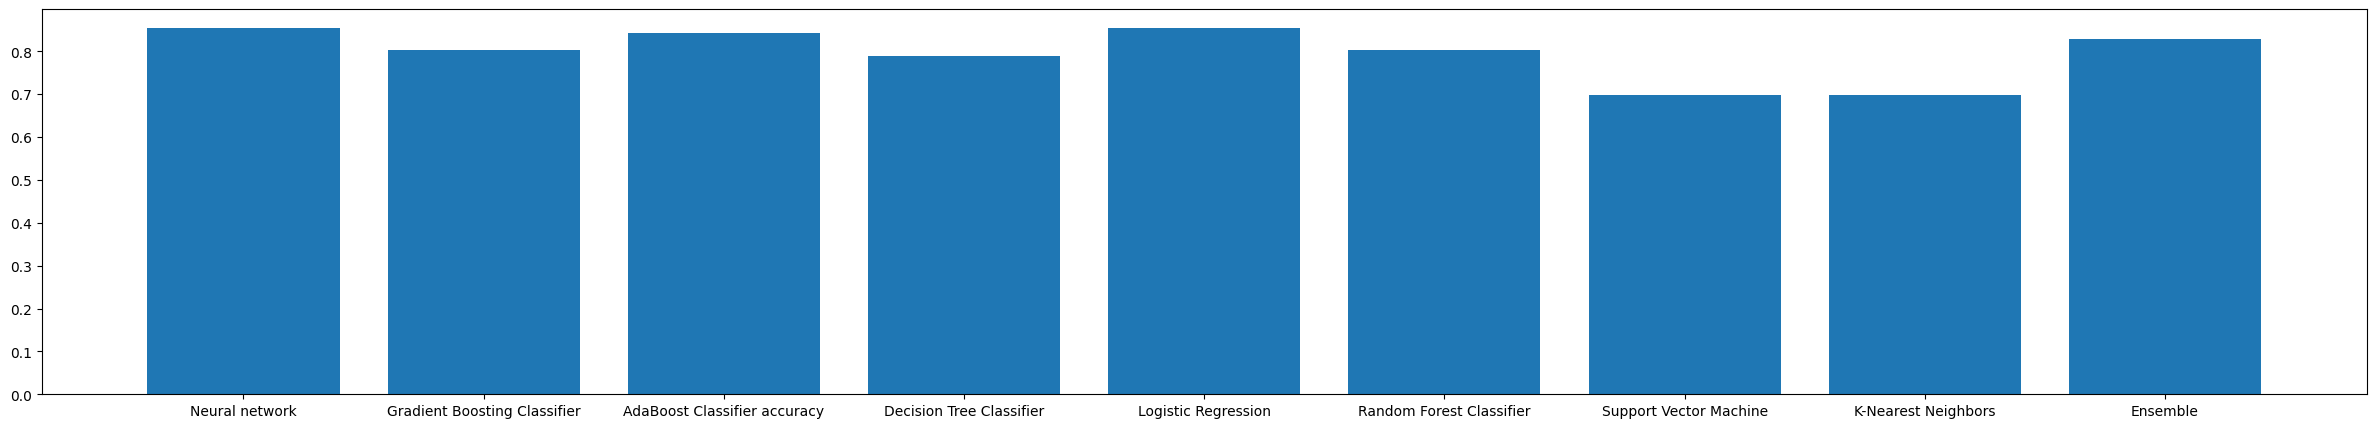

In [33]:
accuracy_dict = {'Neural network': 0.8536585569381714, 'Gradient Boosting Classifier': 0.8026315789473685,
                'AdaBoost Classifier accuracy': 0.8421052631578947, 'Decision Tree Classifier': 0.7894736842105263,
                 'Logistic Regression':0.8552631578947368, 'Random Forest Classifier': 0.8026315789473685,
                 'Support Vector Machine': 0.6973684210526315, 'K-Nearest Neighbors': 0.6973684210526315,
                 'Ensemble': 0.8289473684210527
                 }
names = list(accuracy_dict.keys())
values = list(accuracy_dict.values())
plt_1 = plt.figure(figsize=(30, 5))
plt.bar(range(len(accuracy_dict)), values, tick_label=names)

plt.show()

The neural network outperformed the other machine learning models and the ensemble by varying degrees.